[[1.15694047e+03 0.00000000e+00 6.65948821e+02]
 [0.00000000e+00 1.15213880e+03 3.88784788e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-2.37638060e-01 -8.54041616e-02 -7.90999654e-04 -1.15882223e-04
   1.05725966e-01]]


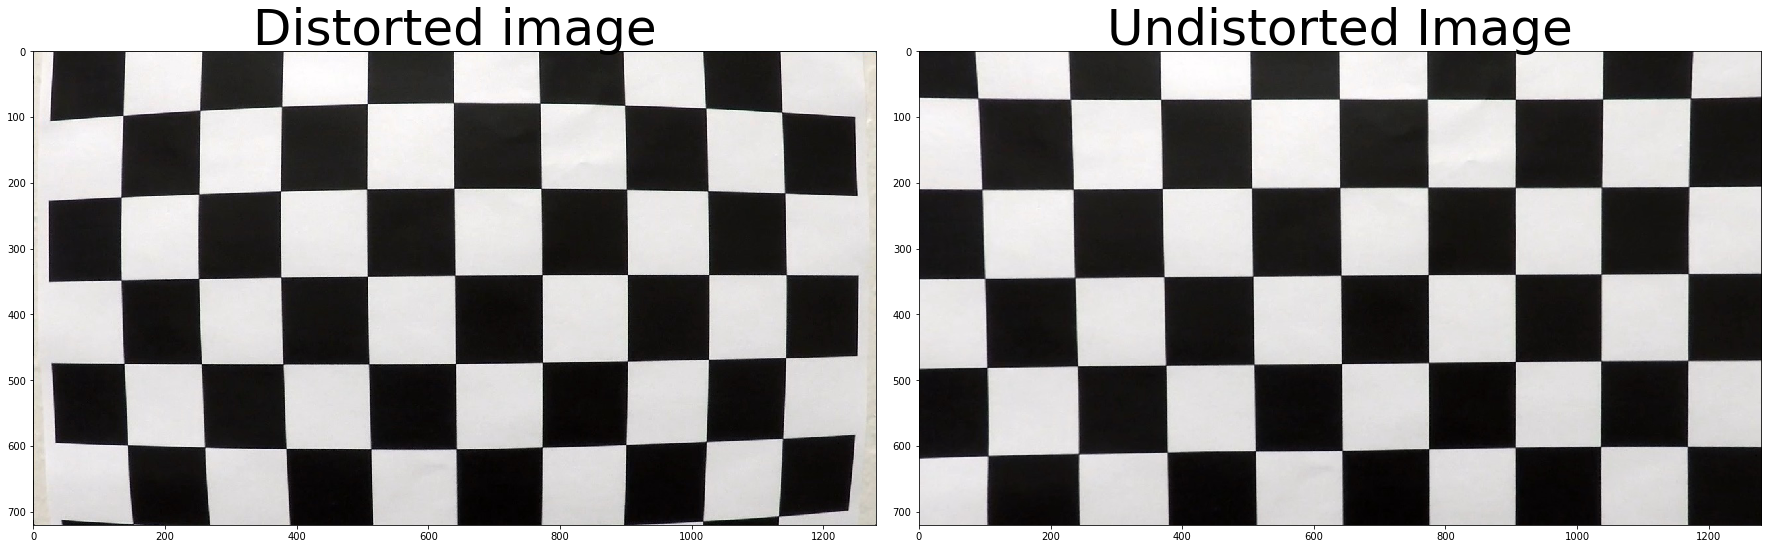

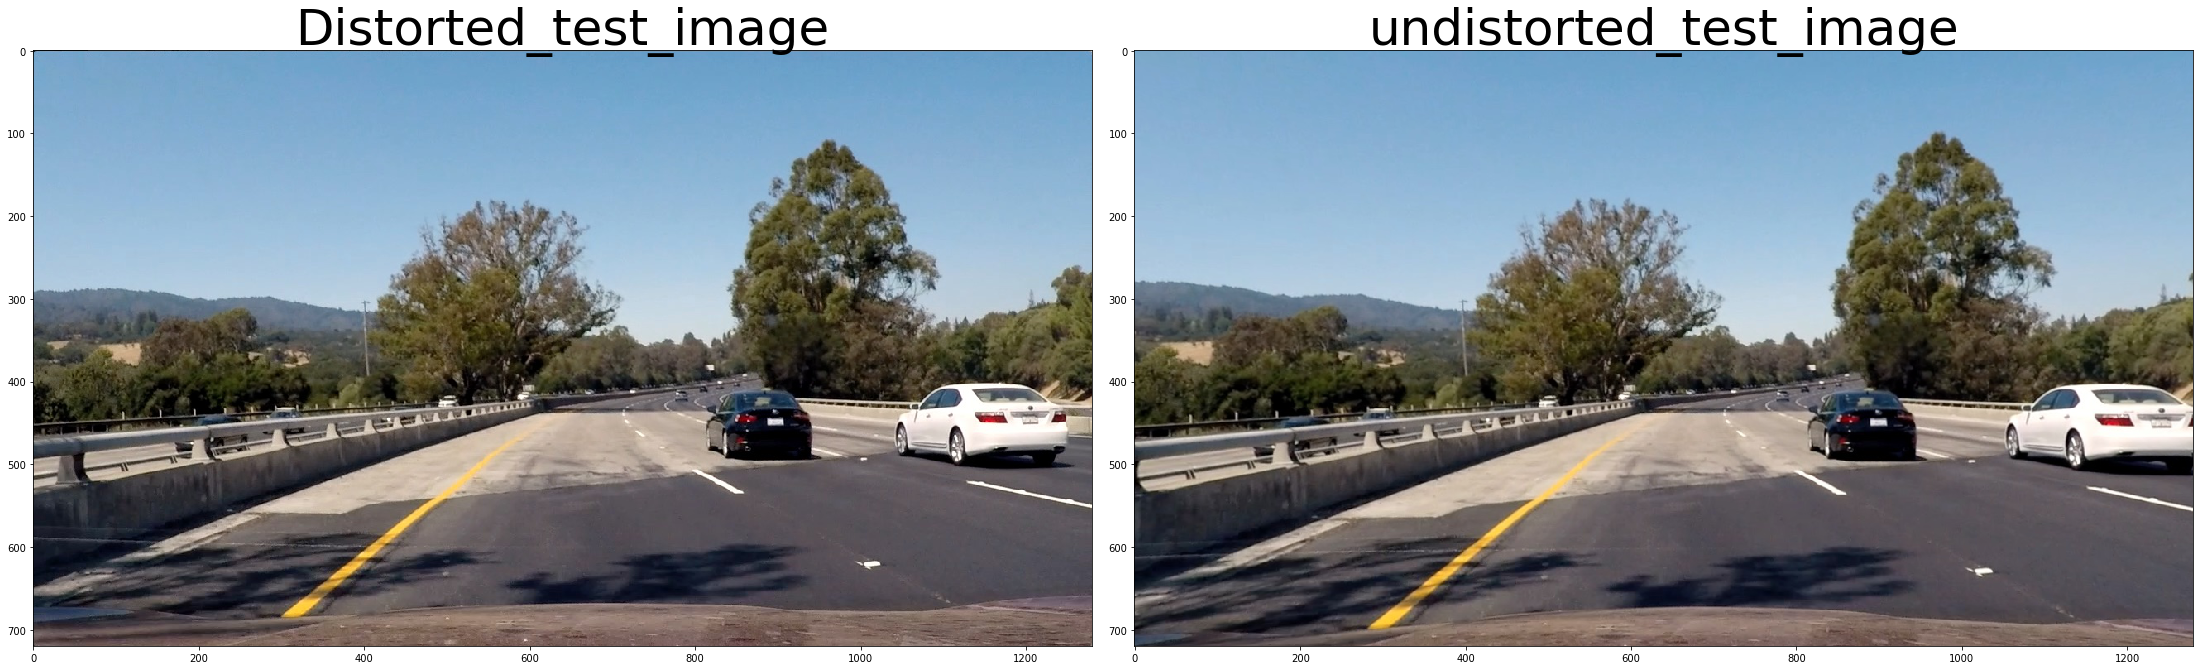

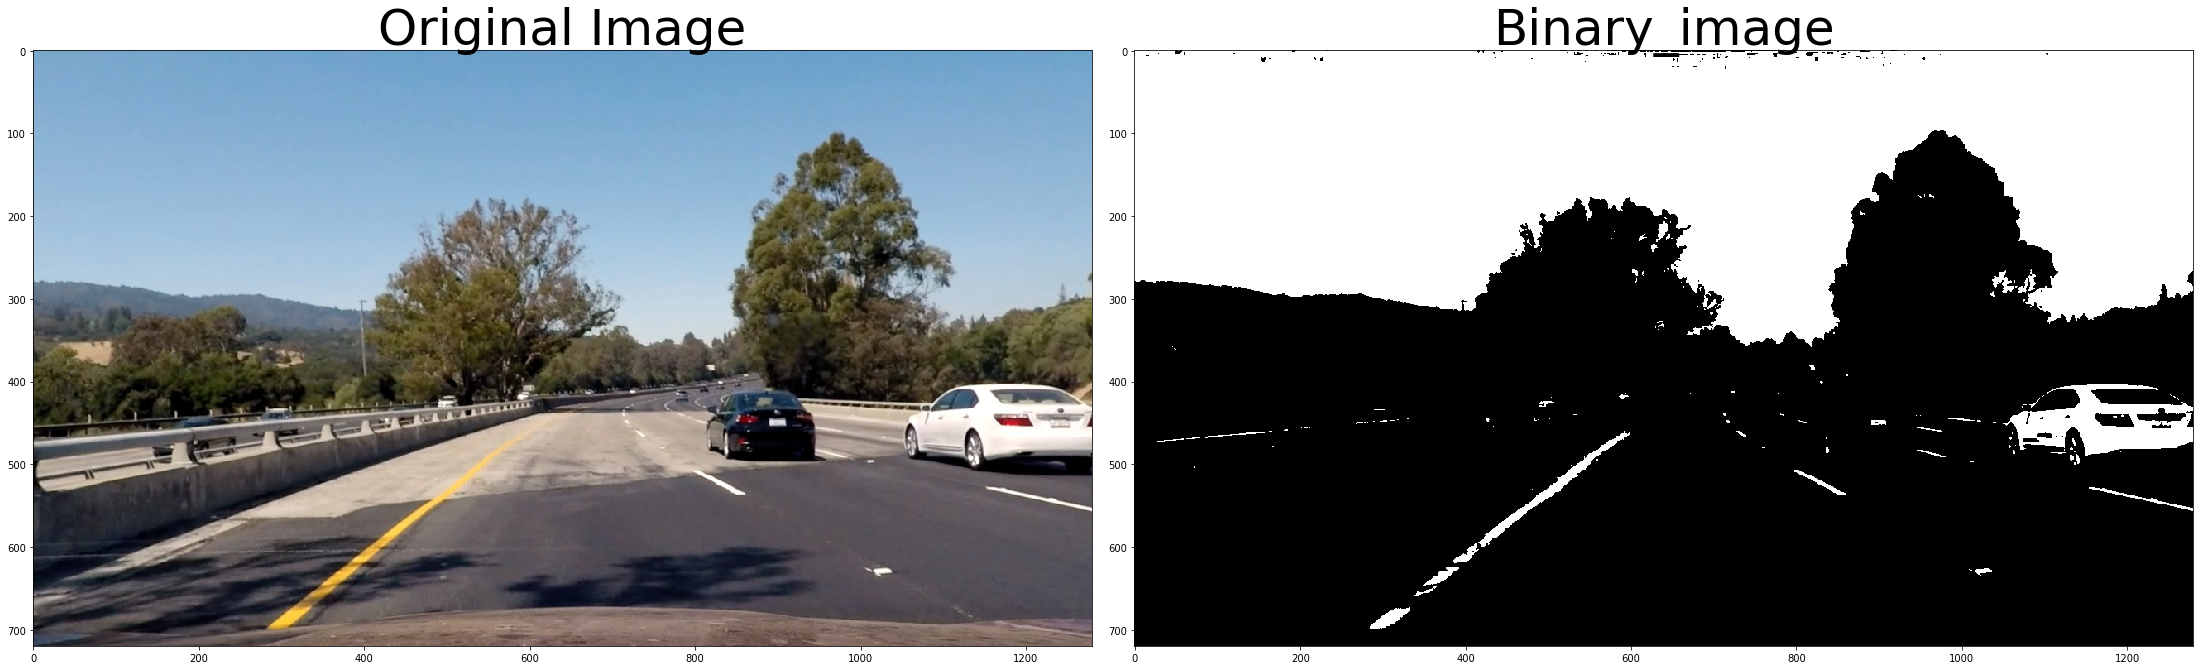

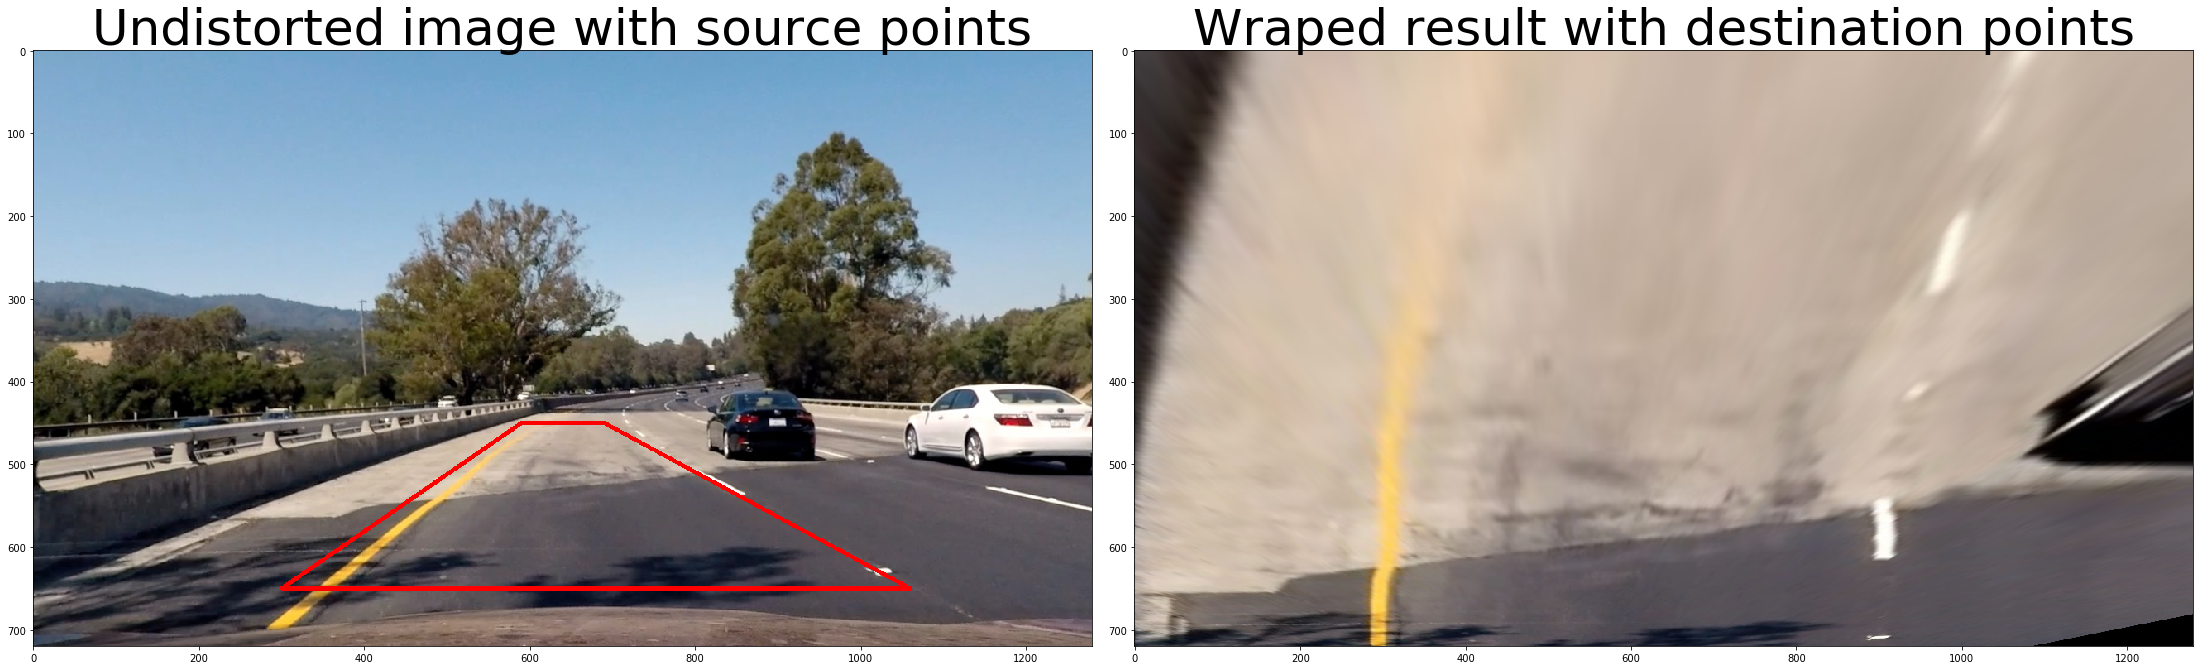

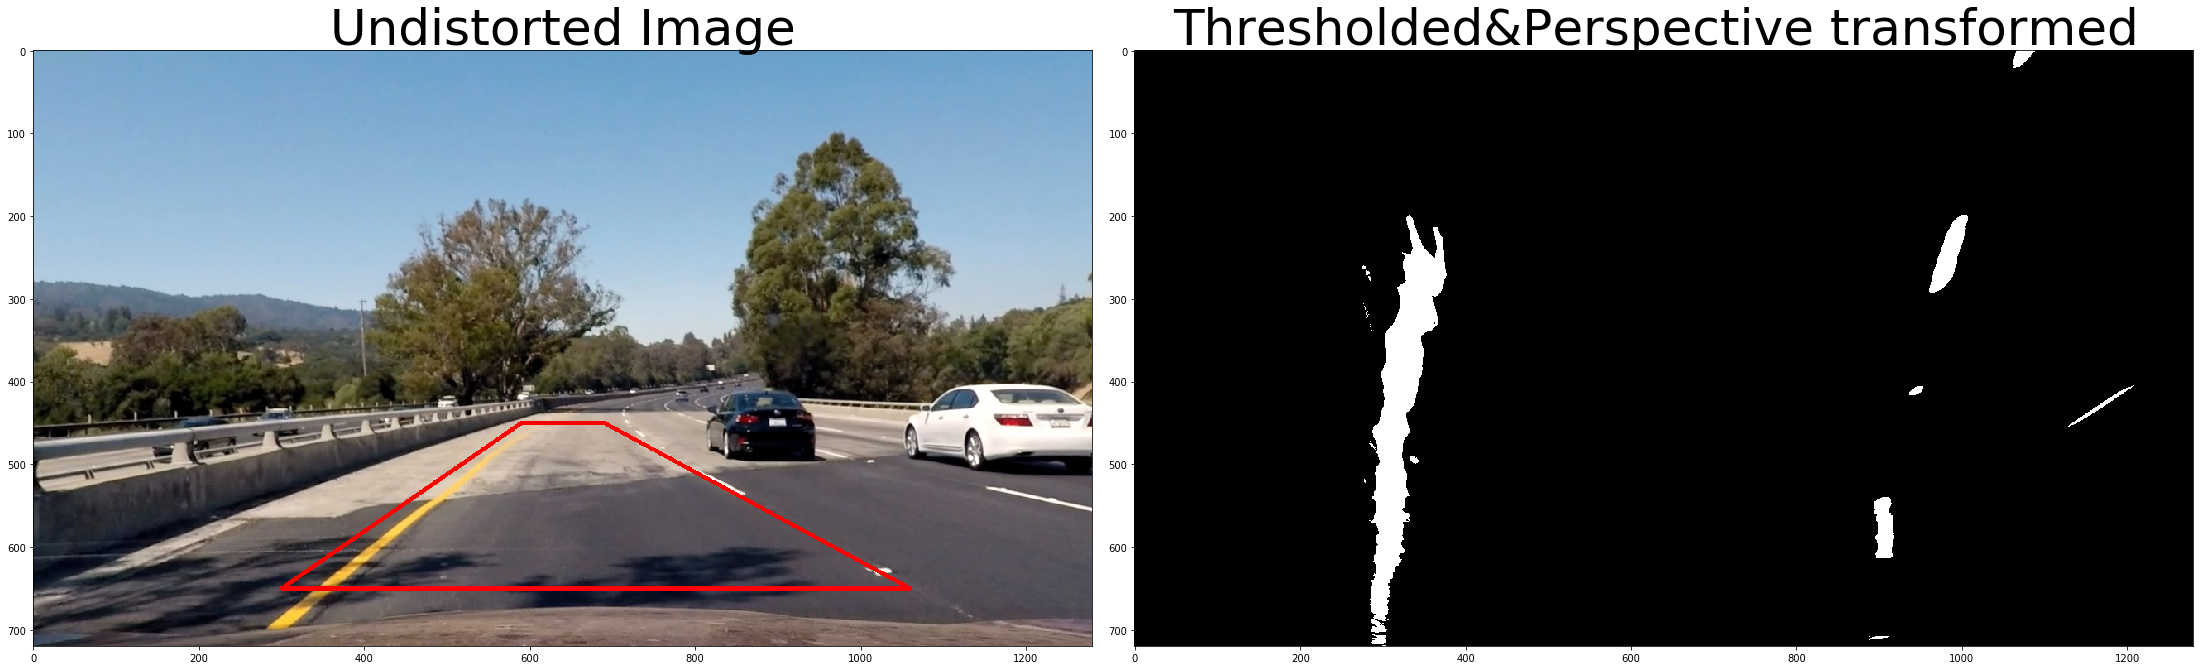

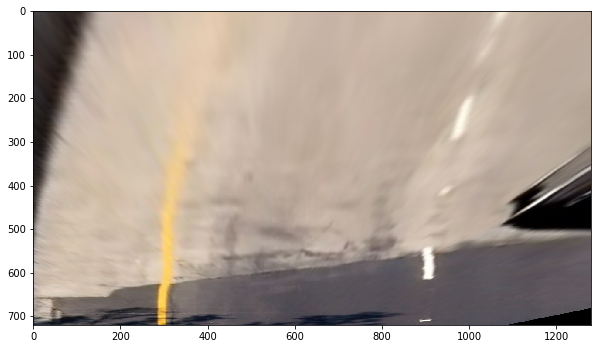

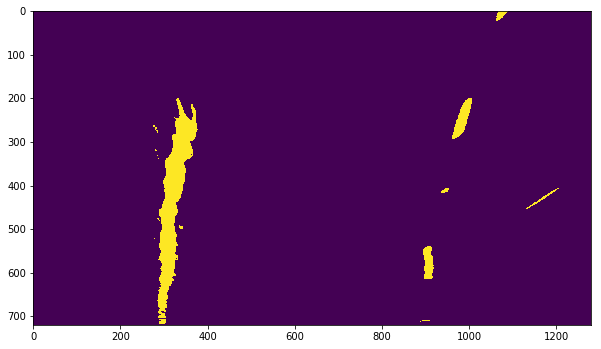

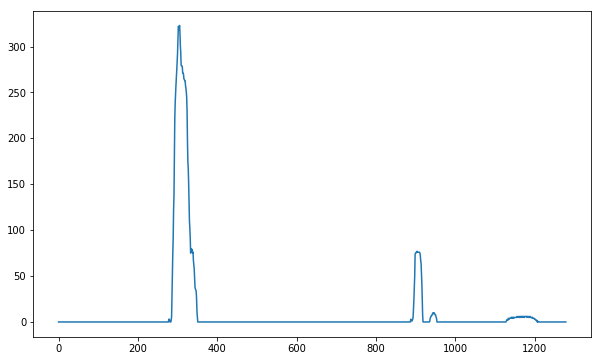

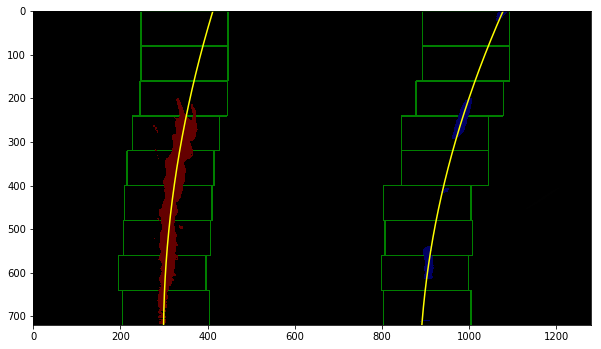

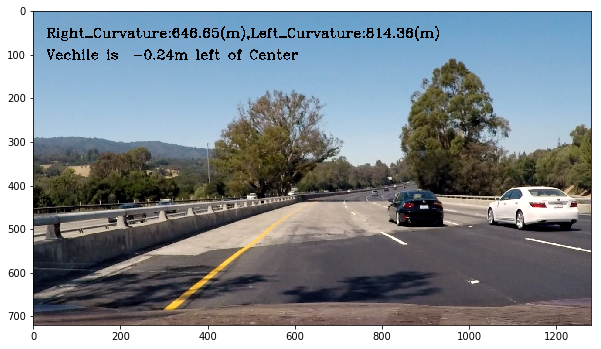

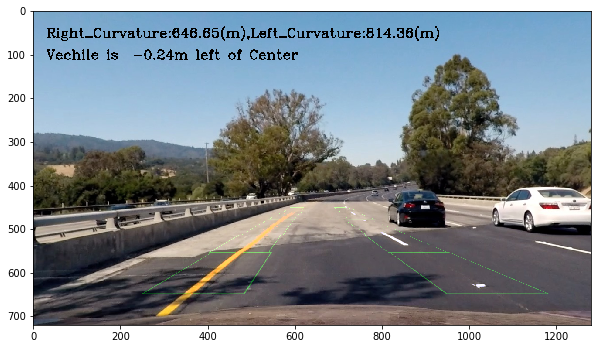

In [1]:
#Murat Tunç Advanced_Lane_Lines_Project_2.ipynb
#importing some useful packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

##############################################################################################################
#PARAMETERS
#Test Images
Distorted_Cheesboard_image = mpimg.imread('camera_cal\calibration1.jpg')
Distorted_test_image = mpimg.imread('test4.jpg')
nx=9
ny=6
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
##############################################################################################################
#CAMERA CALIBRATION
def Calibration(nx,ny):
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001) # termination criteria
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0) objp = np.zeros((6*7,3), np.float32)
    objp = np.zeros((ny*nx,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)
    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d point in real world space
    imgpoints = [] # 2d points in image plane.
    images = Chessboard_images = glob.glob('camera_cal\calibration*.jpg')# Read calibration images
    for fname in images:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # Find the chess board corners
        ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None)
        # If found, add object points, image points (after refining them)
        if ret == True:
            objpoints.append(objp)
            cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
            imgpoints.append(corners)
            
    return objpoints,imgpoints 
##############################################################################################################
#UNDISTORTED AND WRAPPED TEST IMAGES
# Read distorted cheesboard image and test it
objpoints,imgpoints = Calibration(nx,ny)
img_size = (Distorted_Cheesboard_image.shape[1], Distorted_Cheesboard_image.shape[0])
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
print(mtx)
print(dist)
undistorted_image = cv2.undistort(Distorted_Cheesboard_image, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(Distorted_Cheesboard_image)
ax1.set_title('Distorted image', fontsize=50)
ax2.imshow(undistorted_image)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
##############################################################################################################
img_size = (Distorted_test_image.shape[1], Distorted_test_image.shape[0])
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
undistorted_test_image = cv2.undistort(Distorted_test_image, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))
f.tight_layout()
ax1.imshow(Distorted_test_image)
ax1.set_title('Distorted_test_image', fontsize=50)
ax2.imshow(undistorted_test_image)
ax2.set_title('undistorted_test_image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
##############################################################################################################

def drawQuadRectangle(image, points, color=[255, 0, 0], thickness=4):
        p1, p2, p3, p4 = points
        cv2.line(image, tuple(p1), tuple(p2), color, thickness)
        cv2.line(image, tuple(p2), tuple(p3), color, thickness)
        cv2.line(image, tuple(p3), tuple(p4), color, thickness)
        cv2.line(image, tuple(p4), tuple(p1), color, thickness)
##############################################################################################################

def Binary_Conversion_Yellow_White(image):

        def bin_it(image, threshold):
            output_bin = np.zeros_like(image)
            output_bin[(image >= threshold[0]) & (image <= threshold[1])]=1
            return output_bin
        # convert image to hls colour space
        hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS).astype(np.float)
        # binary threshold values
        bin_thresh = [20, 255]
        # rgb thresholding for yellow
        lower = np.array([225,180,0],dtype = "uint8")
        upper = np.array([255, 255, 170],dtype = "uint8")
        mask = cv2.inRange(image, lower, upper)
        rgb_y = cv2.bitwise_and(image, image, mask = mask).astype(np.uint8)
        rgb_y = cv2.cvtColor(rgb_y, cv2.COLOR_RGB2GRAY)
        rgb_y = bin_it(rgb_y, bin_thresh)
        # rgb thresholding for white (best)
        lower = np.array([100,100,200],dtype = "uint8")
        upper = np.array([255, 255, 255],dtype = "uint8")
        mask = cv2.inRange(image, lower, upper)
        rgb_w = cv2.bitwise_and(image, image, mask = mask).astype(np.uint8)
        rgb_w = cv2.cvtColor(rgb_w, cv2.COLOR_RGB2GRAY)
        rgb_w = bin_it(rgb_w, bin_thresh) 
        # hls thresholding for yellow
        lower = np.array([20,120,80],dtype = "uint8")
        upper = np.array([45, 200, 255],dtype = "uint8")
        mask = cv2.inRange(hls, lower, upper)
        hls_y = cv2.bitwise_and(image, image, mask = mask).astype(np.uint8)
        hls_y = cv2.cvtColor(hls_y, cv2.COLOR_HLS2RGB)
        hls_y = cv2.cvtColor(hls_y, cv2.COLOR_RGB2GRAY)
        hls_y = bin_it(hls_y, bin_thresh)
        im_bin = np.zeros_like(hls_y)
        im_bin [(hls_y == 1)|(rgb_y==1)|(rgb_w==1)]= 1
        
        return im_bin
##############################################################################################################

#BINARY TRANSFORM
Binary_Original_image=Binary_Conversion_Yellow_White(undistorted_test_image)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
f.tight_layout()
ax1.imshow(undistorted_test_image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(Binary_Original_image, cmap='gray')
ax2.set_title('Binary_image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
############################################################################################################## 
#PERSPECTIVE TRANSFORM
# Convert to grayscale
undist_gray = cv2.cvtColor(undistorted_test_image, cv2.COLOR_BGR2GRAY)
img_size=(undist_gray.shape[1],undist_gray.shape[0])

src = np.float32(
                    [[590, 450],
                    [690,450],
                    [1060,650],
                    [300,650]])
dst = np.float32(
                    [[250,0],
                    [896,0],
                    [896,720],
                    [250,720]])

M = cv2.getPerspectiveTransform(src,dst)# we can calculate the perspective transform matrix  
Bird_Eye_View = cv2.warpPerspective(undistorted_test_image, M, img_size, flags=cv2.INTER_LINEAR)
#cv2.imwrite('output_images\Bird_Eye_View.jpg',Bird_Eye_View)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
f.tight_layout()
drawQuadRectangle(undistorted_test_image, src, [255, 0, 0])
ax1.imshow(undistorted_test_image)
ax1.set_title('Undistorted image with source points', fontsize=50)
#drawQuadRectangle(Bird_Eye_View, dst, [255, 0, 0])
ax2.imshow(Bird_Eye_View)
ax2.set_title('Wraped result with destination points', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
##############################################################################################################
#APPLY BINARY HISTOGRAM
Bird_Eye_View_binary =Binary_Conversion_Yellow_White(Bird_Eye_View)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
f.tight_layout()
ax1.imshow(undistorted_test_image)
ax1.set_title('Undistorted Image', fontsize=50)
ax2.imshow(Bird_Eye_View_binary, cmap='gray')
ax2.set_title('Thresholded&Perspective transformed ', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
##############################################################################################################

plt.figure(figsize=(10,6))
plt.imshow(Bird_Eye_View)

plt.figure(figsize=(10,6))
plt.imshow(Bird_Eye_View_binary)
##############################################################################################################
def display_on_frame(image, left_curverad, right_curverad, car_off):

    # create display texts on image
    font = cv2.FONT_HERSHEY_COMPLEX
    curve_disp_txt = 'Right_Curvature:' + str(np.round(right_curverad,2)) + '(m),Left_Curvature:' + str(np.round(left_curverad,2)) + '(m)'
    off_disp_txt = 'Vechile is  ' + str(np.round(car_off,2)) + 'm left of Center'
    cv2.putText(image, curve_disp_txt, (30, 60), font, 1, (0,0,0), 2)
    cv2.putText(image, off_disp_txt, (30, 110), font, 1, (0,0,0), 2)
    return image

##############################################################################################################
def find_lane_pixels(binary_warped):
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped)).astype(np.int8)#*255
    window_img = np.zeros_like(out_img)
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)

    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

##############################################################################################################    
#FIT POLYNOMIAL
    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    
    img_size = binary_warped.shape
    left_grad = 2 * left_fit[0] * img_size[0]/2.0 + left_fit[1]
    right_grad = 2 * right_fit[0] * img_size[0]/2.0 + right_fit[1]
    
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    
    
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty
        
    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]
    
    # change the colour of nonzero pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [100, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 100]
    
    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))
##############################################################################################################

#5.0-->CALCULATE CURVATURE AND VEHICLE POSITION
    # Define y-value where we want radius of curvature
    # We choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty) 
    
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720.0 # meters per pixel in y dimension
    xm_per_pix = 3.7/700.0 # meters per pixel in x dimension
    
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)

    #Calculate the new radious of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
        

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (255,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))

    # out_img = out_img.astype(np.int8)
    result = cv2.addWeighted(out_img, 1, window_img, 0.2, 0)        
    
    # %% Warp the detected lane boundaries back onto the original image
    # # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(result, np.int_([pts]), (0,255, 0))

    plt.figure(figsize=(10,6))
    plt.plot(histogram)
    plt.figure(figsize=(10,6))
    plt.imshow(out_img)
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')

    ##############################################################################################################
    #5.0-->DISPLAY TEXT ON FRAME
    #Display texts on image using passed values
    # create display texts on image
    font = cv2.FONT_HERSHEY_COMPLEX
    curve_disp_txt = 'Right_Curvature:' + str(np.round(right_curverad,2)) + '(m),Left_Curvature:' + str(np.round(left_curverad,2)) + '(m)'
    cv2.putText(Distorted_test_image, curve_disp_txt, (30, 60), font, 1, (0,0,0), 2)

    left_intcpt = left_fit[0]*img_size[0]**2 + left_fit[1]*img_size[0] + left_fit[2]
    # right line intercept on x axis
    right_intcpt = right_fit[0]*img_size[0]**2 + right_fit[1]*img_size[0] + right_fit[2]
    lane_width = abs(right_intcpt-left_intcpt)
    lane_mid = (left_intcpt + right_intcpt)/2.0
    # car offset, im meters
    car_off = (lane_mid - img_size[1]/2.0)*xm_per_pix
    off_disp_txt = 'Vechile is  ' + str(np.round(car_off,2)) + 'm left of Center'
    cv2.putText(Distorted_test_image, off_disp_txt, (30, 110), font, 1, (0,0,0), 2)
    plt.figure(figsize=(10,6))
    plt.imshow(Distorted_test_image)

###################################################################################
#Step 7:The Result
    test_image = mpimg.imread('test4.jpg')
    img_size = (test_image.shape[1], test_image.shape[0])
    # Do camera calibration given object points and image points
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    undistorted_test_image = cv2.undistort(test_image, mtx, dist, None, mtx)
    original_frame = np.copy(undistorted_test_image)

    img_size = (out_img.shape[:2][0], out_img.shape[:2][1])
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    src = np.float32(
                    [[590, 450],
                    [690,450],
                    [1060,650],
                    [300,650]])
    dst = np.float32(
                    [[250,0],
                    [896,0],
                    [896,720],
                    [250,720]])
    Minv = cv2.getPerspectiveTransform(dst,src)
    newwarp = cv2.warpPerspective(out_img.astype(np.float32), Minv, img_size[::-1]) 
    newwarp = np.uint8(newwarp)
    # Combine the result with the original image
    out_img = cv2.addWeighted(original_frame, 1, newwarp, 0.75, 0)
    
    left_intcpt = left_fit[0]*img_size[0]**2 + left_fit[1]*img_size[0] + left_fit[2]

    # right line intercept on x axis
    right_intcpt = right_fit[0]*img_size[0]**2 + right_fit[1]*img_size[0] + right_fit[2]

    lane_width = abs(right_intcpt-left_intcpt)
    lane_mid = (left_intcpt + right_intcpt)/2.0
    # car offset, im meters
    xm_per_pix = 3.7/700.0 # meters per pixel in x dimension
    car_off = (lane_mid - img_size[1]/2.0)*xm_per_pix
    # display visuals on frame
    
    out_img = display_on_frame(out_img, left_curverad=left_curverad, right_curverad=right_curverad,
                        car_off=car_off)
  
    plt.figure(figsize=(10,6))
    plt.imshow(out_img)
    write_name='output_images/Result_Test_Image_1.jpg'
    cv2.imwrite(write_name,out_img)

    return out_img

'''
#Test image results
images=glob.glob('test_images/test*.jpg')

for idx,fname in enumerate(images):
    #Undistored input images
    img =  cv2.imread(fname)
    original_Image = np.copy(img)
    img_size=(img.shape[1],img.shape[0])
    img = cv2.undistort(img,mtx,dist,None,mtx)
    ##############################################################################
    
    #Binary Conversion to Undistored Image
    process_Image = np.zeros_like(img[:,:0])
    process_Image = Binary_Conversion_Yellow_White(img)
    ##############################################################################
    
    #Perspective Transform
    M    = cv2.getPerspectiveTransform(src,dst)
    Minv = cv2.getPerspectiveTransform(dst,src)
    Warped_Image = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
 
    ##############################################################################
  
    #Binary Conversion to Warped Image
    Warped_Image_Binary = np.zeros_like(Warped_Image[:,:0])
    Warped_Image_Binary=Binary_Conversion_Yellow_White(Warped_Image)
    ##############################################################################
    
    #Find lane lines and Calculate Radious left and Right Curvature
    frame, left_curverad, right_curverad ,left_fit,right_fit = find_lane_pixels(Warped_Image_Binary)
    
    img_size = (frame.shape[:2][0], frame.shape[:2][1])
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(frame.astype(np.float32), Minv, img_size[::-1]) 
    newwarp = np.uint8(newwarp)
    # Combine the result with the original image
    frame = cv2.addWeighted(original_Image, 1, newwarp, 0.75, 0)
    left_intcpt = left_fit[0]*img_size[0]**2 + left_fit[1]*img_size[0] + left_fit[2]
    # right line intercept on x axis
    right_intcpt = right_fit[0]*img_size[0]**2 + right_fit[1]*img_size[0] + right_fit[2]
    lane_width = abs(right_intcpt-left_intcpt)
    lane_mid = (left_intcpt + right_intcpt)/2.0
    # car offset, im meters
    xm_per_pix = 3.7/700.0 # meters per pixel in x dimension
    car_off = (lane_mid - img_size[1]/2.0)*xm_per_pix
    # display visuals on frame
    frame = display_on_frame(frame, left_curverad=left_curverad, right_curverad=right_curverad,
                        car_off=car_off)
    
    write_name='output_images/Result_Test_Image'+str(idx)+'.jpg'
    result=frame
    cv2.imwrite(write_name,result)
    ##############################################################################
    '''


resut_Image=find_lane_pixels(Bird_Eye_View_binary)






